### Geopandas demo
Here we will demonstrate how to open, subset, clip, and plot spatial data using the `geopandas` and `matplotlib` libraries in `python`. For this demonstration you will learn how to clip shapefile data. We will use the the American Indian Alaska Native Native Hawaii (AIANNH) land areas in the US state of Hawaii for this example. Data are coming from the US Census Bureau through [data.gov](https://www.data.gov):
> * [US State Boundaries](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)
> * [AIANNH Boundaries](https://data.amerigeoss.org/dataset/tiger-line-shapefile-2020-nation-u-s-american-indian-alaska-native-native-hawaiian-aiannh-areas)


Read more about `geopandas` in our free, open, [Earth Data Science](https://www.earthdatascience.org/) textbook: 

> * [Reproject vector data](https://www.earthdatascience.org/workshops/gis-open-source-python/reproject-vector-data-in-python/)
> * [Dissolove polygons](https://www.earthdatascience.org/workshops/gis-open-source-python/dissolve-polygons-in-python-geopandas-shapely/)
> * [Cropping a raster to a shapefile](https://www.earthdatascience.org/workshops/gis-open-source-python/crop-raster-data-in-python/)

Also some really great resources here on the HI open GIS page:
> * [HI GIS](https://planning.hawaii.gov/gis/download-gis-data-expanded/)

In [1]:
# Import python libraries
import geopandas as gpd    # to work with spatial data
import matplotlib.pyplot as plt    # to plot data

# Open US State boundary
us_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"

us_gdf = gpd.read_file(us_url)
us_gdf


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


   STATEFP   STATENS     AFFGEOID GEOID STUSPS    NAME LSAD        ALAND  \
48      15  01779782  0400000US15    15     HI  Hawaii   00  16633990195   

         AWATER                                           geometry  
48  11777809026  MULTIPOLYGON (((-156.04965 19.78045, -156.0062...  
The CRS of the HI shapefile is: EPSG:4269


<Axes: >

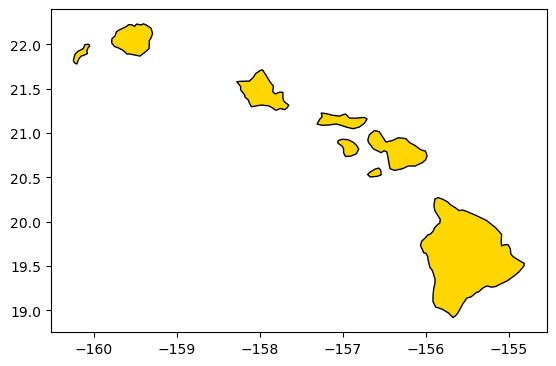

In [16]:
# Select HI
hi_bndry = us_gdf.loc[us_gdf['NAME'] == 'Hawaii']
print(hi_bndry)

# Print the coordinate reference system (CRS) of the HI boundary and plot
print("The CRS of the HI shapefile is:", hi_bndry.crs)
hi_bndry.plot(color='gold',
                    edgecolor='black')

    STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0        15      007  040900        3  150070409003  Block Group 3  G5030   
1        15      007  040900        4  150070409004  Block Group 4  G5030   
2        15      007  040900        6  150070409006  Block Group 6  G5030   
3        15      007  040400        2  150070404002  Block Group 2  G5030   
4        15      007  040300        6  150070403006  Block Group 6  G5030   
..      ...      ...     ...      ...           ...            ...    ...   
870      15      007  040603        1  150070406031  Block Group 1  G5030   
871      15      007  040604        3  150070406043  Block Group 3  G5030   
872      15      009  031101        1  150090311011  Block Group 1  G5030   
873      15      009  031700        5  150090317005  Block Group 5  G5030   
874      15      009  030402        4  150090304024  Block Group 4  G5030   

    FUNCSTAT     ALAND   AWATER     INTPTLAT      INTPTLON  \
0          S 

<Axes: >

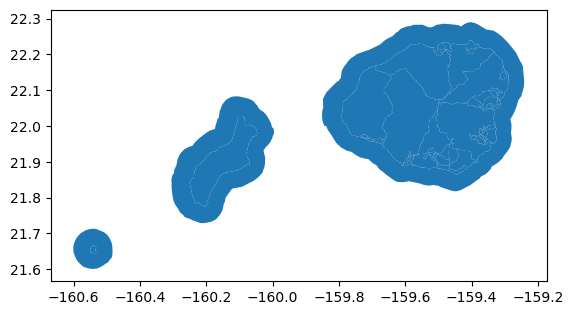

In [12]:
# Opening HI shp
hi = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/BG/tl_2019_15_bg.zip")
print(hi)



# Select HI
hi_island_3 = hi.loc[hi['COUNTYFP'] == '007']
print(hi_island_3)

hi_island_3.plot()


In [4]:
hi

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,15,007,040900,3,150070409003,Block Group 3,G5030,S,1647232,1294744,+21.9562762,-159.6736840,"POLYGON ((-159.69437 21.95583, -159.69346 21.9..."
1,15,007,040900,4,150070409004,Block Group 4,G5030,S,699114,1331873,+21.9604675,-159.7041784,"POLYGON ((-159.73303 21.97091, -159.73179 21.9..."
2,15,007,040900,6,150070409006,Block Group 6,G5030,S,1153934,231770,+21.9753853,-159.7287428,"POLYGON ((-159.73301 21.97104, -159.73295 21.9..."
3,15,007,040400,2,150070404002,Block Group 2,G5030,S,4328505,0,+21.9600452,-159.3740230,"POLYGON ((-159.38907 21.96448, -159.38900 21.9..."
4,15,007,040300,6,150070403006,Block Group 6,G5030,S,2129312,0,+22.0998566,-159.3287832,"POLYGON ((-159.34664 22.10046, -159.34622 22.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,15,007,040603,1,150070406031,Block Group 1,G5030,S,27449025,2088334,+21.9052078,-159.4262793,"POLYGON ((-159.46795 21.88375, -159.46788 21.8..."
871,15,007,040604,3,150070406043,Block Group 3,G5030,S,8577679,223901,+21.9237453,-159.4769565,"POLYGON ((-159.50819 21.92648, -159.50796 21.9..."
872,15,009,031101,1,150090311011,Block Group 1,G5030,S,1050442,0,+20.8927561,-156.4813334,"POLYGON ((-156.48693 20.88894, -156.48690 20.8..."
873,15,009,031700,5,150090317005,Block Group 5,G5030,S,1828171,763142,+21.0814479,-156.9994970,"POLYGON ((-157.01065 21.08442, -157.01058 21.0..."


    AIANNHCE  AIANNHNS  GEOID  \
0       2320  02419022  2320R   
1       9100  01930930  9100R   
2       4110  02419484  4110R   
3       1380  01666180  1380R   
4       1110  00806894  1110R   
..       ...       ...    ...   
854     5970  02418712  5970R   
855     5955  02418655  5955R   
856     4910  02418987  4910R   
857     4930  02419124  4930R   
858     4940  02419125  4940R   

                                                  NAME  \
0                                              Mohegan   
1                               Golden Hill Paugussett   
2                                       Table Mountain   
3                                           Greenville   
4                                             Flathead   
..                                                 ...   
854                                       Miami/Peoria   
855  Kiowa-Comanche-Apache-Ft Sill Apache/Caddo-Wic...   
856  Kickapoo (KS) Reservation/Sac and Fox Nation T...   
857                 San

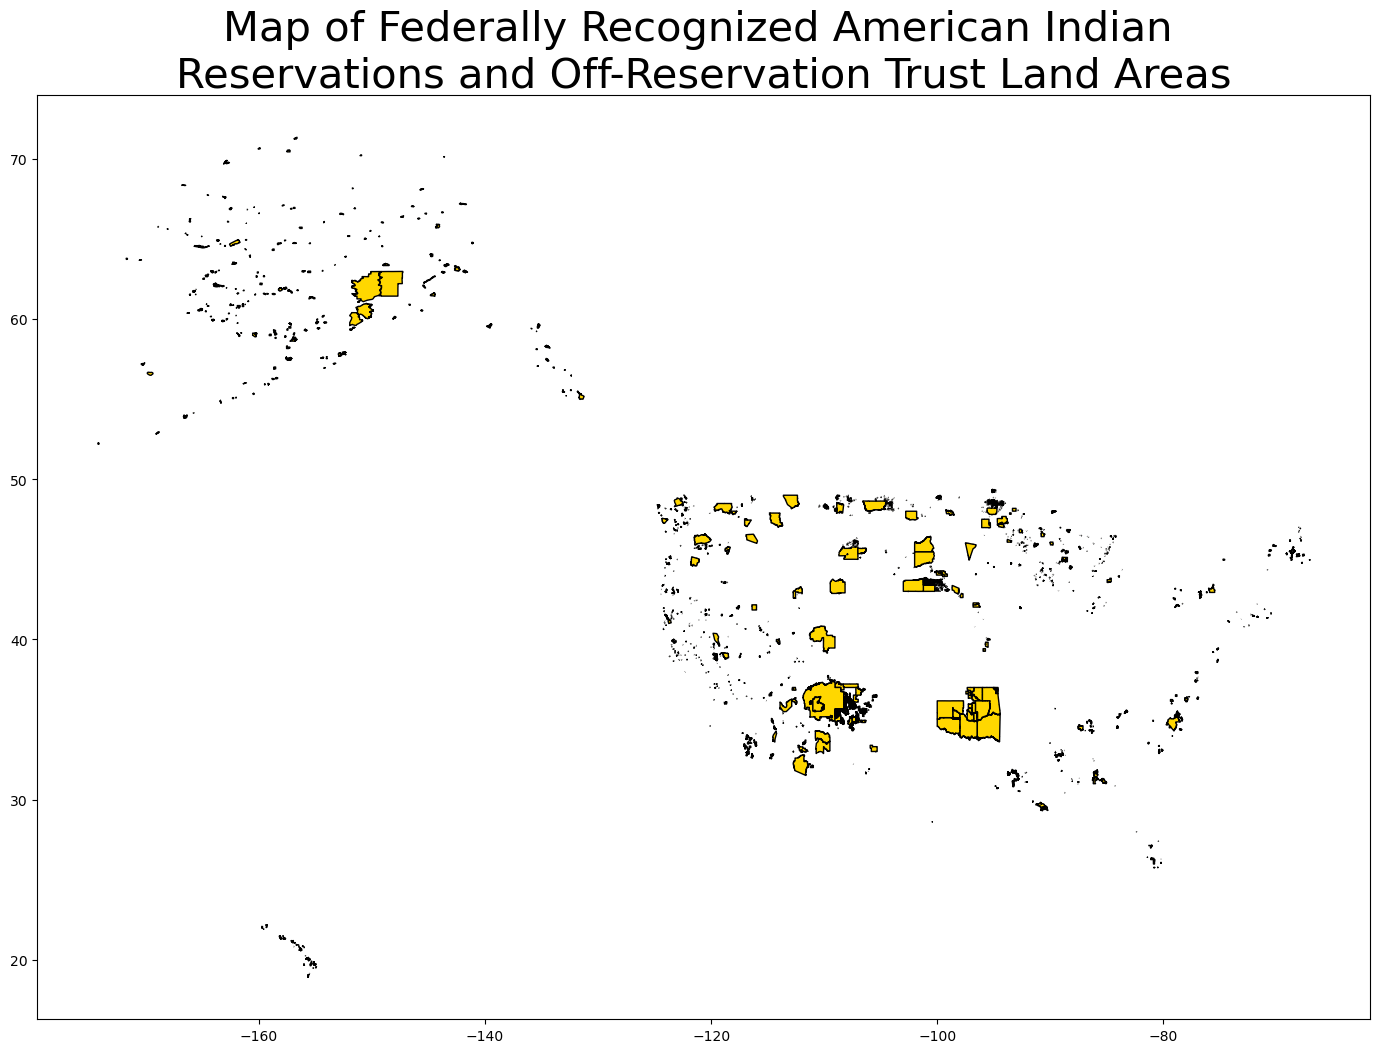

In [13]:
# Land AIANNH land areas url
aiannh_url = "https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip"

# Open land area boundaries
aiannh_boundary = gpd.read_file(aiannh_url)
print(aiannh_boundary)

# Plot land area boundaries using matplotlib
fig, ax = plt.subplots(figsize=(20,12))
aiannh_boundary.plot(color='gold',
                         edgecolor='black',
                         ax=ax)
ax.set_title("Map of Federally Recognized American Indian \nReservations and Off-Reservation Trust Land Areas", fontsize=30)
plt.show()


In [19]:
# Clip AIANNH boundary to HI boundary
aiannh_hi = aiannh_boundary.clip(hi_bndry.geometry)
aiannh_hi

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
544,5056,01853340,5056T,Kamaoa-Puueo,Kamaoa-Puueo Hawaiian Home Land,78,F1,T,F,G2120,N,45555656,0,+18.9614914,-155.6530393,"POLYGON ((-155.68462 18.95242, -155.68363 18.9..."
526,5283,00364821,5283T,Waiohinu,Waiohinu Hawaiian Home Land,78,F1,T,F,G2120,N,1116534,0,+19.0735740,-155.6202342,"MULTIPOLYGON (((-155.62519 19.07967, -155.6240..."
534,5251,00364713,5251T,Wailau,Wailau Hawaiian Home Land,78,F1,T,F,G2120,N,258239,0,+19.1446123,-155.5171123,"POLYGON ((-155.51921 19.14721, -155.51915 19.1..."
532,5069,00362767,5069T,Kaohe-Olaa,Kaohe-Olaa Hawaiian Home Land,78,F1,T,F,G2120,N,2753098,0,+19.4883211,-155.1922628,"MULTIPOLYGON (((-155.18511 19.49491, -155.1832..."
530,5146,00362126,5146T,Makuu,Makuu Hawaiian Home Land,78,F1,T,F,G2120,N,8898121,0,+19.5268775,-154.9639958,"MULTIPOLYGON (((-154.93661 19.58130, -154.9365..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,5286,01853042,5286T,Waiohuli (Residential),Waiohuli (Residential) Hawaiian Home Land,78,F1,T,F,G2120,N,14917552,0,+20.7346031,-156.3756928,"POLYGON ((-156.40688 20.74566, -156.40300 20.7..."
519,5248,02634649,5248T,Waiku-Hana,Waiku-Hana Hawaiian Home Land,78,F1,T,F,G2120,N,2981190,0,+20.7742294,-156.0131566,"POLYGON ((-156.02942 20.77029, -156.02742 20.7..."
501,5199,02414182,5199T,Pulehunui,Pulehunui Hawaiian Home Land,78,F1,T,F,G2120,N,1587124,0,+20.8127136,-156.4634679,"MULTIPOLYGON (((-156.46848 20.81183, -156.4684..."
548,5104,00360975,5104T,Keanae-Wailua,Keanae-Wailua Hawaiian Home Land,78,F1,T,F,G2120,N,995339,0,+20.8421412,-156.1470862,"MULTIPOLYGON (((-156.13252 20.84448, -156.1323..."


In [14]:
# Open HI roads
hi_rds = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/PRISECROADS/tl_2019_15_prisecroads.zip")
hi_rds

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1104258643968,Puainako Exd,M,S1200,"LINESTRING (-155.11039 19.69256, -155.11049 19..."
1,1103933153286,Puanako Exd,M,S1200,"LINESTRING (-155.14804 19.68121, -155.14938 19..."
2,1103890709860,Puainako Exd,M,S1200,"LINESTRING (-155.15660 19.68084, -155.15641 19..."
3,1104486222576,Keaau Byp,M,S1200,"LINESTRING (-155.03130 19.62267, -155.03204 19..."
4,1104486197669,Keaau Byp,M,S1200,"LINESTRING (-155.02989 19.61407, -155.02981 19..."
...,...,...,...,...,...
833,1105558965997,State Rte 31,S,S1200,"LINESTRING (-156.46198 20.78569, -156.46164 20..."
834,1104468780506,Kalae Hwy,M,S1200,"LINESTRING (-157.00530 21.17538, -157.00490 21..."
835,11057868404,State Rte 360,S,S1200,"LINESTRING (-156.26478 20.91705, -156.26477 20..."
836,11057872937,Kaumalapau Hwy,M,S1200,"LINESTRING (-156.91849 20.81757, -156.91888 20..."


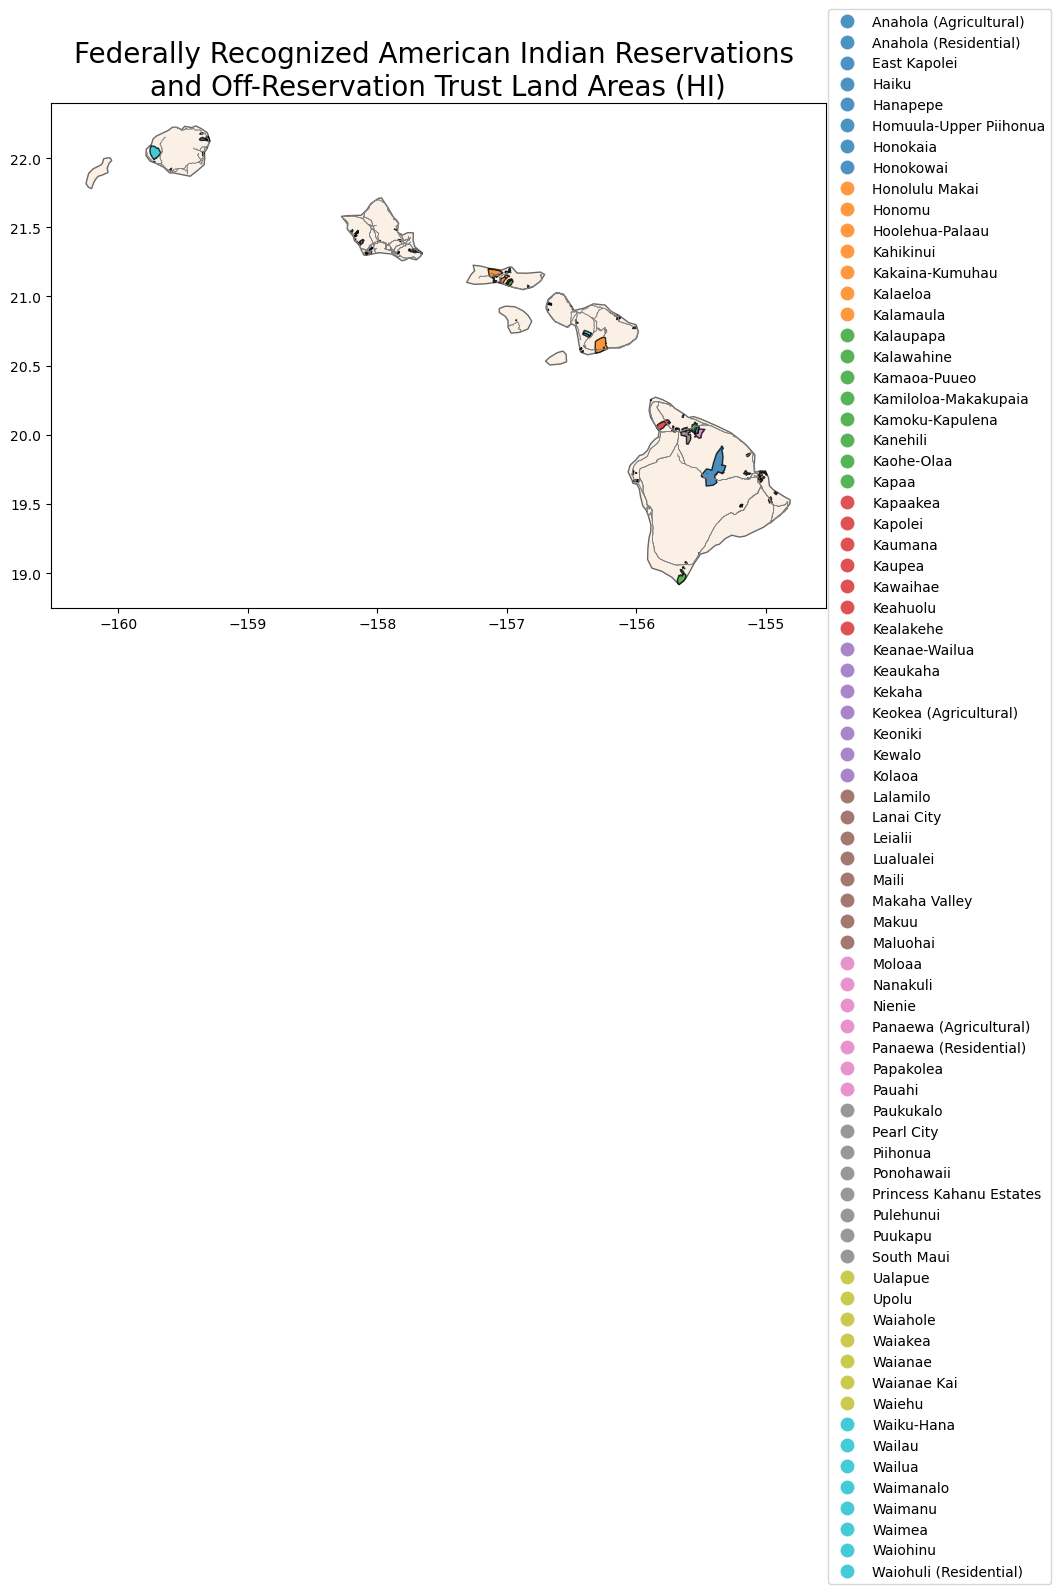

In [20]:
# Plot clipped AIANNH boundary
fig, ax = plt.subplots(figsize=(10,7))
hi_bndry.plot(color='linen',
              edgecolor='dimgrey',
              ax=ax)

hi_rds.plot(ax=ax, color='grey',
           linewidth=0.5)


aiannh_hi.plot(ax=ax,
               edgecolor='black',
               column='NAME',
               legend=True,
               alpha=0.8)

# Define and place legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3, 1.2, 0., 0.))

plt.title("Federally Recognized American Indian Reservations \nand Off-Reservation Trust Land Areas (HI)", fontsize=20)
plt.show()

In [21]:
bndry = gpd.read_file("https://files.hawaii.gov/dbedt/op/gis/data/ahupuaa.shp.zip")
bndry

,ahupuaa,moku,mokupuni,other,gisacres,gisacres_t,Shape_Leng,Shape_Area,geometry
0,Waimea,Kona,Niʻihau,Lehua,271.787890,271.787*,6196.093258,1.099887e+06,"POLYGON ((386745.452 2434896.250, 386712.452 2..."
1,Waimea,Kona,Niʻihau,None,46049.630880,46049.6*,83650.171203,1.863562e+08,"POLYGON ((383835.279 2428236.050, 383846.654 2..."
2,Kīlauea,Koʻolau,Kauaʻi,None,3767.416334,3767.41*,23535.499921,1.524619e+07,"POLYGON ((457803.853 2457743.790, 457822.135 2..."
3,Hanalei,Haleleʻa,Kauaʻi,None,16836.406241,16836.4*,48784.287700,6.813452e+07,"POLYGON ((448357.838 2455549.783, 448425.684 2..."
4,Hāʻena,Haleleʻa,Kauaʻi,None,1847.349503,1847.34*,16590.440320,7.475958e+06,"POLYGON ((438615.848 2456401.813, 438618.942 2..."
...,...,...,...,...,...,...,...,...,...
720,Kaloʻi,Honuaʻula,Maui,None,1897.202837,1897.20*,17921.664966,7.677707e+06,"POLYGON ((773469.891 2284054.909, 772719.246 2..."
721,Kalihi,Honuaʻula,Maui,None,1262.924961,1262.92*,12679.173869,5.110876e+06,"POLYGON ((771727.422 2283594.132, 771710.171 2..."
722,Papaka Uka,Honuaʻula,Maui,None,39.879548,39.8795*,2206.572878,1.613868e+05,"POLYGON ((771826.486 2283538.883, 771706.608 2..."
723,Papaka Kai,Honuaʻula,Maui,None,1278.714372,1278.71*,11483.138782,5.174773e+06,"POLYGON ((771144.722 2282515.857, 771225.911 2..."


<Axes: >

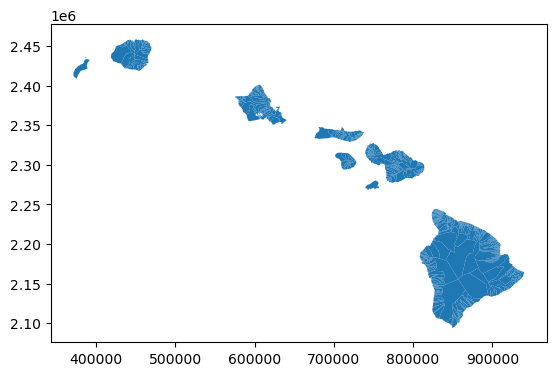

In [10]:
bndry.plot()

In [11]:
pip install earthpy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import earthpy as et
import earthpy.plot as ep
import rioxarray as rxr
import rasterio

EPSG:26904


<Axes: >

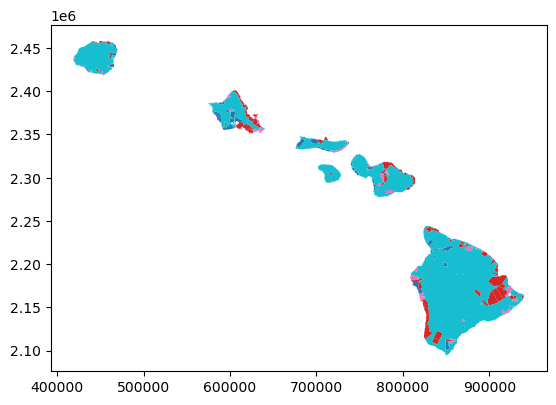

In [23]:
fire_risk = gpd.read_file("https://files.hawaii.gov/dbedt/op/gis/data/firerisk.shp.zip")
print(fire_risk.crs)
fire_risk.plot(column="Risk_Ratin")


<Axes: >

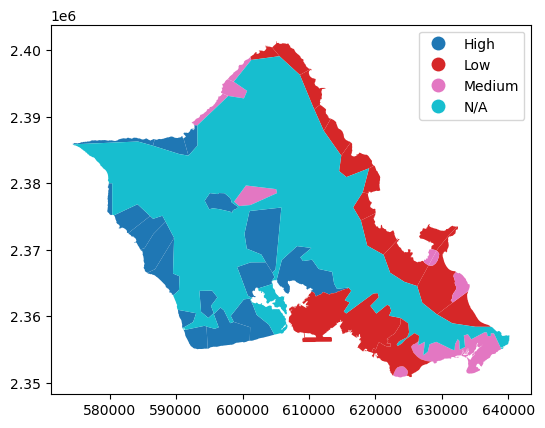

In [24]:
fire_risk_oahu = fire_risk.loc[fire_risk['Island'] == 'Oahu']


fire_risk_oahu.plot(column='Risk_Ratin',
                    legend=True)

In [25]:
fire_risk_oahu_4269 = fire_risk_oahu.to_crs("EPSG:4269")
fire_risk_oahu_4269

,OBJECTID,SHAPE_Leng,SHAPE_Area,Commu_name,Island,Risk_Ratin,Zone,geometry
0,3,10839.318888,2.950927e+06,Makua Keeau,Oahu,High,1,"POLYGON ((-158.23109 21.48288, -158.23108 21.4..."
1,7,15218.462631,1.252174e+07,Makaha,Oahu,High,1,"POLYGON ((-158.22134 21.47749, -158.18706 21.4..."
2,8,17224.414237,1.307421e+07,Waianae,Oahu,High,1,"POLYGON ((-158.20063 21.45326, -158.16887 21.4..."
3,10,19702.894542,1.895375e+07,Maili,Oahu,High,1,"POLYGON ((-158.18321 21.43089, -158.17728 21.4..."
4,11,22360.696946,1.575314e+07,Nanakuli,Oahu,High,1,"POLYGON ((-158.17330 21.39915, -158.16211 21.4..."
5,13,9091.270741,4.409734e+06,Honokai Hale/Koolina,Oahu,High,1,"POLYGON ((-158.12943 21.34866, -158.10289 21.3..."
6,15,12195.231581,9.425681e+06,Barbers Point,Oahu,High,1,"POLYGON ((-158.12111 21.32096, -158.12111 21.3..."
7,17,20292.210366,1.894690e+07,Ewa,Oahu,High,1,"POLYGON ((-158.05269 21.33994, -158.03353 21.3..."
8,20,26169.113760,3.602897e+07,Mililani,Oahu,High,2,"POLYGON ((-158.03208 21.45158, -158.02453 21.4..."
9,21,19031.504627,1.812593e+07,Waikele,Oahu,High,1,"POLYGON ((-158.04306 21.40624, -158.02324 21.4..."


<Axes: >

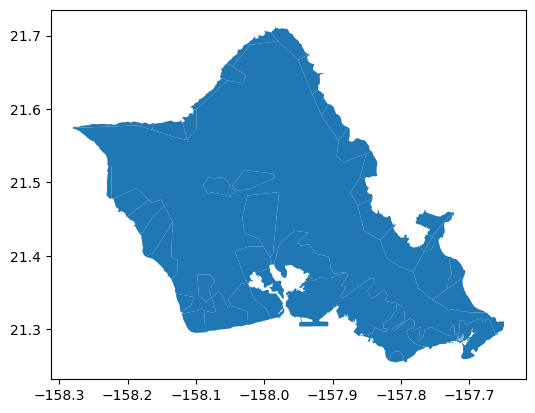

In [26]:
fire_risk_oahu_4269.plot()

In [27]:
# Clip AIANNH and rds to Oahu boundary

aiannh_oahu = aiannh_boundary.clip(fire_risk_oahu_4269.geometry)
aiannh_oahu

rds_oahu = hi_rds.clip(fire_risk_oahu_4269.geometry)
rds_oahu

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
598,1104258527784,State Rte 72,S,S1200,"MULTILINESTRING ((-157.77972 21.27780, -157.77..."
505,1104258463929,State Rte 72,S,S1200,"MULTILINESTRING ((-157.71527 21.28306, -157.71..."
302,1104258527783,State Rte 72,S,S1200,"MULTILINESTRING ((-157.71527 21.28306, -157.71..."
301,1104259509177,State Hwy 72,S,S1200,"MULTILINESTRING ((-157.77972 21.27780, -157.77..."
780,110509759401,Kalanianaole Hwy,M,S1200,"MULTILINESTRING ((-157.77972 21.27780, -157.77..."
...,...,...,...,...,...
815,1106087406282,Joseph P Leong Hwy,M,S1200,"MULTILINESTRING ((-158.09982 21.60184, -158.09..."
139,1104257991258,State Rte 93,S,S1200,"MULTILINESTRING ((-158.13525 21.36773, -158.13..."
431,1104257594374,Farrington Hwy,M,S1200,"MULTILINESTRING ((-158.13525 21.36773, -158.13..."
719,1106092755624,State Hwy 930,S,S1200,"LINESTRING (-158.26721 21.57604, -158.26699 21..."


In [28]:
fire_risk_oahu_clean = fire_risk_oahu_4269.loc[fire_risk_oahu_4269['Zone'] != 0]
fire_risk_oahu_clean


,OBJECTID,SHAPE_Leng,SHAPE_Area,Commu_name,Island,Risk_Ratin,Zone,geometry
0,3,10839.318888,2.950927e+06,Makua Keeau,Oahu,High,1,"POLYGON ((-158.23109 21.48288, -158.23108 21.4..."
1,7,15218.462631,1.252174e+07,Makaha,Oahu,High,1,"POLYGON ((-158.22134 21.47749, -158.18706 21.4..."
2,8,17224.414237,1.307421e+07,Waianae,Oahu,High,1,"POLYGON ((-158.20063 21.45326, -158.16887 21.4..."
3,10,19702.894542,1.895375e+07,Maili,Oahu,High,1,"POLYGON ((-158.18321 21.43089, -158.17728 21.4..."
4,11,22360.696946,1.575314e+07,Nanakuli,Oahu,High,1,"POLYGON ((-158.17330 21.39915, -158.16211 21.4..."
5,13,9091.270741,4.409734e+06,Honokai Hale/Koolina,Oahu,High,1,"POLYGON ((-158.12943 21.34866, -158.10289 21.3..."
6,15,12195.231581,9.425681e+06,Barbers Point,Oahu,High,1,"POLYGON ((-158.12111 21.32096, -158.12111 21.3..."
7,17,20292.210366,1.894690e+07,Ewa,Oahu,High,1,"POLYGON ((-158.05269 21.33994, -158.03353 21.3..."
8,20,26169.113760,3.602897e+07,Mililani,Oahu,High,2,"POLYGON ((-158.03208 21.45158, -158.02453 21.4..."
9,21,19031.504627,1.812593e+07,Waikele,Oahu,High,1,"POLYGON ((-158.04306 21.40624, -158.02324 21.4..."


In [29]:
census_boundaries = gpd.read_file("https://files.hawaii.gov/dbedt/op/gis/data/county20.shp.zip")
census_boundaries

census_boundaries_4269 = census_boundaries.to_crs("EPSG:4269")
census_boundaries_4269

honolulu_co = census_boundaries_4269.loc[census_boundaries_4269['NAME20'] == 'Honolulu']
honolulu_co

,OBJECTID,GEOID20,NAME20,NAMELSAD20,ALAND20,AWATER20,POP20,Shape_Leng,Shape_Area,geometry
4,5,15003,Honolulu,Honolulu County,1.555613e+09,4.054877e+09,1016508,399978.752128,1.550291e+09,"MULTIPOLYGON (((-157.70848 21.29238, -157.7084..."


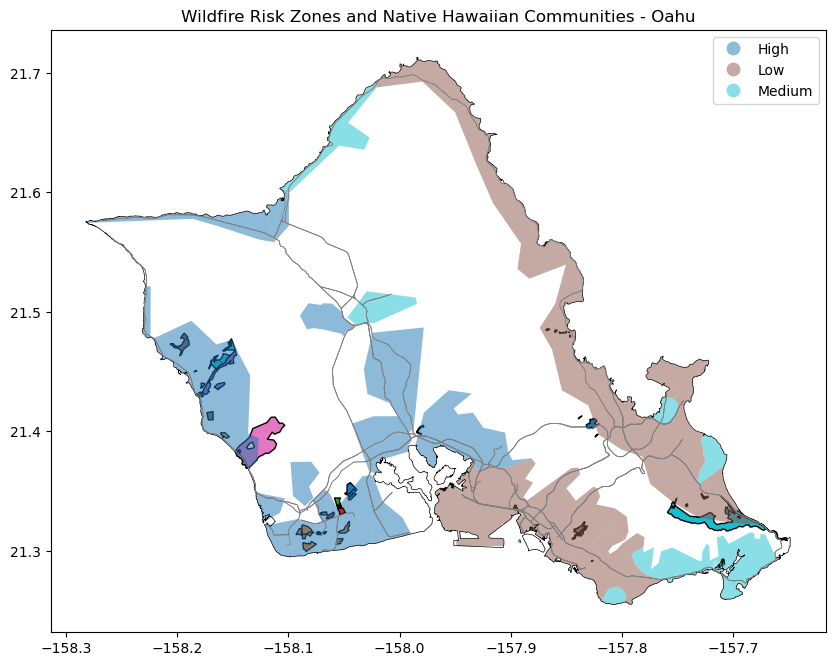

In [30]:
fig, ax = plt.subplots(figsize=(10,12))
aiannh_oahu.plot(column='NAME',
                legend=True,
                ax=ax,
                edgecolor='black')
fire_risk_oahu_clean.plot(ax=ax, 
                        column='Risk_Ratin',
                        alpha=0.5,
                        legend=True)

rds_oahu.plot(ax=ax,
              color='grey', 
              linewidth=0.5)


honolulu_co.plot(ax=ax,
                 edgecolor='black',
                 color='None',
                 linewidth=0.5)

ax.set(title='Wildfire Risk Zones and Native Hawaiian Communities - Oahu')
plt.show()
# Add the legends to the plot
#ax.add_artist(legend1)
# Define and place legend
#leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.5, 1.2, 0., 0.))

#### Looking at biodiversity data

In [2]:
# Land cover
hi_bio = gpd.read_file("https://files.hawaii.gov/dbedt/op/gis/data/cah_land_cover_poly.shp.zip")
hi_bio

,Det_LC,Gen_LC,Gen_LC_Srt,Biome_Unit,Biome_U_St,Maj_LC,Maj_LC_Srt,Moisture_Z,Hab_Status,Shape_Leng,Shape_Area,geometry
0,Alien dry grassland,Alien Dry Grassland,6B Alien Dry Grassland,Dry Grassland,3C Dry Grassland,Grassland,3 Grassland,Dry,Native / Alien Mix,120.0,900.0,"POLYGON ((811051.669 2180795.633, 811051.669 2..."
1,Alien mesic grassland,Alien Mesic Grassland,5D Alien Mesic Grassland,Mesic Grassland,2C Mesic Grassland,Grassland,3 Grassland,Mesic,Native / Alien Mix,120.0,900.0,"POLYGON ((817771.669 2180795.633, 817741.669 2..."
2,Alien mesic grassland,Alien Mesic Grassland,5D Alien Mesic Grassland,Mesic Grassland,2C Mesic Grassland,Grassland,3 Grassland,Mesic,Native / Alien Mix,180.0,1800.0,"POLYGON ((817951.669 2180795.633, 817891.669 2..."
3,Low intensity developed,Developed,7A Developed,Developed,4B Developed,Developed,5 Developed,N/A,Heavily Disturbed,120.0,900.0,"POLYGON ((818791.669 2180795.633, 818761.669 2..."
4,Low intensity developed,Developed,7A Developed,Developed,4B Developed,Developed,5 Developed,N/A,Heavily Disturbed,120.0,900.0,"POLYGON ((818851.669 2180795.633, 818821.669 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...
875009,Kiawe dry forest and shrubland,Alien Dry Forest,6A Alien Dry Forest,Dry Forest,3A Dry Forest,Forest,1 Forest,Dry,Native / Alien Mix,120.0,900.0,"POLYGON ((753991.669 2276555.633, 753961.669 2..."
875010,Very sparse vegetation to unvegetated,Bare Ground,7B Bare Ground,Not Vegetated,4C Not Vegetated,Not Vegetated,6 Not Vegetated,N/A,Bare < 5% plant cover,600.0,9900.0,"POLYGON ((754891.669 2276735.633, 754891.669 2..."
875011,Alien dry grassland,Alien Dry Grassland,6B Alien Dry Grassland,Dry Grassland,3C Dry Grassland,Grassland,3 Grassland,Dry,Native / Alien Mix,120.0,900.0,"POLYGON ((755401.669 2276555.633, 755371.669 2..."
875012,Alien dry shrubland,Alien Dry Shrub,6C Alien Dry Shrub,Dry Shrubland,3B Dry Shrubland,Shrubland,2 Shrubland,Dry,Native / Alien Mix,780.0,11700.0,"POLYGON ((755581.669 2276735.633, 755581.669 2..."


In [31]:
# Threatened and Endanged Plants
teplant = gpd.read_file("https://files.hawaii.gov/dbedt/op/gis/data/teplant_n83.shp.zip")
teplant

,AREA,PERIMETER,ALLTEPLNT_,ALLTEPLNT1,DENSITY,geometry
0,4.867411e+08,529034.836585,2,13,O,"POLYGON ((458314.317 2458249.138, 458322.254 2..."
1,1.902135e+06,10317.800962,3,11,O,"POLYGON ((442760.330 2457818.212, 442824.144 2..."
2,9.179411e+07,55010.572535,4,15,VH,"POLYGON ((439742.742 2457336.068, 439748.305 2..."
3,3.279459e+08,178669.083832,5,13,M,"POLYGON ((442264.782 2457079.919, 442398.159 2..."
4,3.303067e+06,21530.291228,6,11,O,"POLYGON ((445018.500 2456925.434, 445047.249 2..."
...,...,...,...,...,...,...
290,2.050724e+08,54178.124321,292,1,O,"POLYGON ((862419.910 2163741.565, 862577.909 2..."
291,7.853837e+06,17373.058891,293,2,L,"POLYGON ((895185.959 2155641.954, 895430.966 2..."
292,4.494997e+08,166777.955348,294,2,L,"POLYGON ((893197.528 2151917.926, 893263.413 2..."
293,1.641461e+08,125327.472270,295,3,M,"POLYGON ((881187.888 2144578.475, 880939.518 2..."


<Axes: >

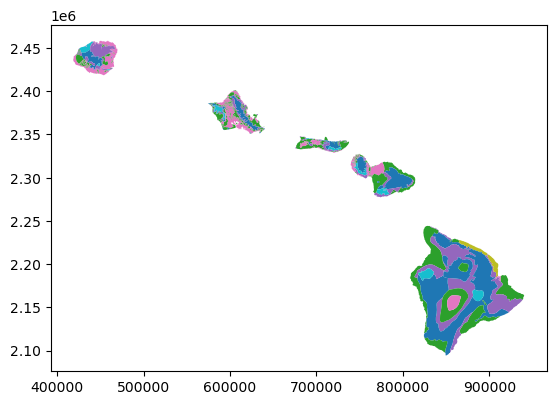

In [5]:
teplant.plot(column='DENSITY')

In [32]:
# Reproject teplant data to EPSG:4269 (lat/long)

teplant_4269 = teplant.to_crs("EPSG:4269")
#teplant_4269


# Clip teplant data to fire risk
teplant_4269_oahu = teplant_4269.clip(fire_risk_oahu_4269.geometry)
teplant_4269_oahu

,AREA,PERIMETER,ALLTEPLNT_,ALLTEPLNT1,DENSITY,geometry
160,4.902594e+05,4248.601565,162,35,L,"POLYGON ((-157.70461 21.26826, -157.70572 21.2..."
159,1.575358e+06,5380.526530,161,37,H,"POLYGON ((-157.69878 21.27463, -157.69763 21.2..."
155,4.056876e+06,11260.470893,157,41,L,"POLYGON ((-157.67457 21.28488, -157.67466 21.2..."
154,8.043244e+05,4553.646958,156,35,L,"POLYGON ((-157.71235 21.29918, -157.71219 21.2..."
151,1.218205e+06,6607.132029,153,35,L,"POLYGON ((-157.67056 21.30659, -157.67033 21.3..."
...,...,...,...,...,...,...
89,4.175315e+06,11050.995766,91,35,L,"POLYGON ((-158.22861 21.52257, -158.22861 21.5..."
80,1.022050e+06,5099.493776,82,35,L,"POLYGON ((-158.24877 21.55551, -158.24884 21.5..."
69,1.411968e+07,30589.449048,71,40,H,"POLYGON ((-158.26393 21.57715, -158.26374 21.5..."
72,2.932900e+06,9860.580064,74,35,L,"POLYGON ((-158.25682 21.56471, -158.25762 21.5..."


<Axes: >

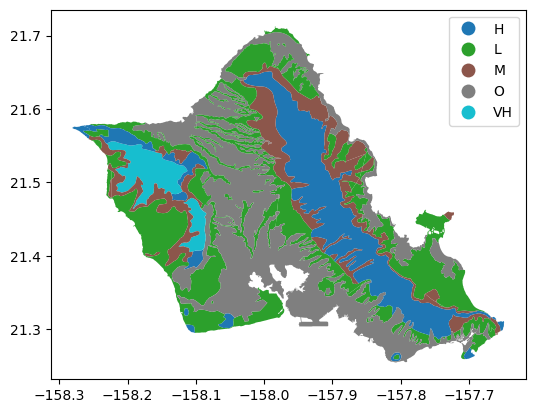

In [36]:
teplant_4269_oahu.plot(column='DENSITY', legend=True)

#### Trying to open some raster data here (hillshade)

In [22]:
# Open data using rioxarray

lidar_url = "https://data.cyverse.org/dav-anon/iplant/projects/earthlab/oahu/hilloah.tif"

oahu_lidar = rxr.open_rasterio(lidar_url, masked=True).squeeze(axis=0)
oahu_lidar

<xarray.DataArray (y: 5048, x: 6582)>
[33225936 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 5.744e+05 5.745e+05 ... 6.402e+05 6.403e+05
  * y            (y) float64 2.401e+06 2.401e+06 ... 2.351e+06 2.351e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        IMAGINE TIFF Support\nCopyright 1991 - 1999 by E...
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

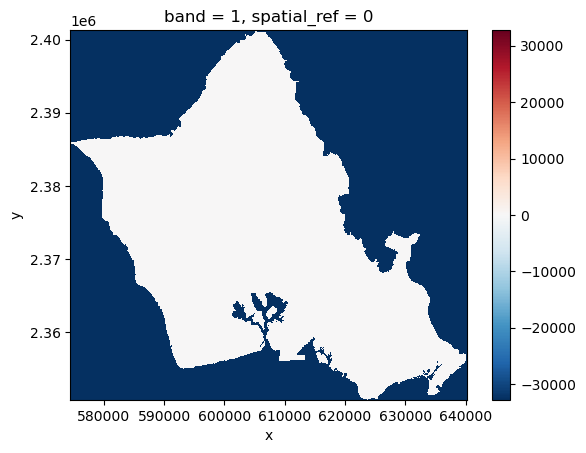

In [23]:
oahu_lidar.plot()

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

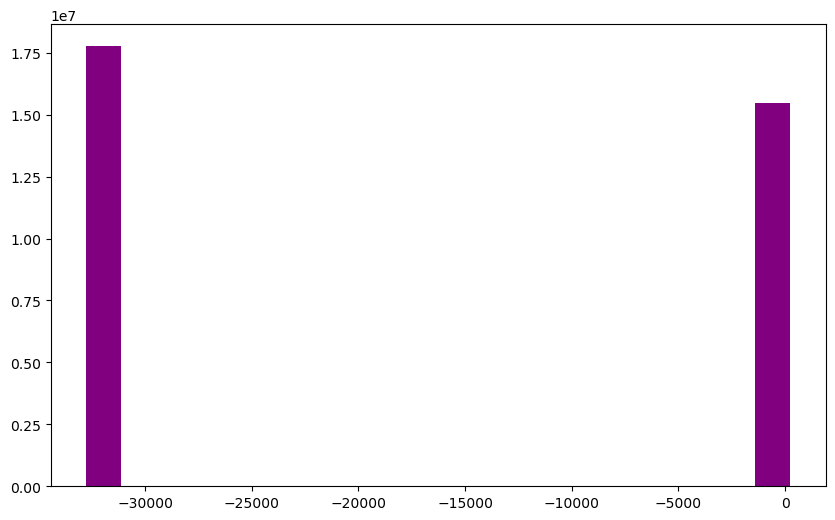

In [24]:
ep.hist(oahu_lidar.values, colors=["purple"], figsize=(10,6))

In [25]:
oahu_lidar.shape

(5048, 6582)

In [26]:
print(oahu_lidar.rio.nodata)

None


In [27]:
oahu_lidar.values

array([[-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       ...,
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.]],
      dtype=float32)